In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import time
import h5py

import seaborn as sns

from cosmos.traces.cosmos_traces import CosmosTraces
import cosmos.traces.trace_analysis_utils as utils
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.params import trace_analyze_params as params

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

/home/deisseroth/venv2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Dropbox path -- only this needs to be changed between computers
dropbox_path = '/home/deisseroth/Dropbox/Projects/'

# Set derived paths
# DATASETS TO USE (FULL WINDOW, CUX2-AI148):
# 8 (m72), 12 (m194), 13 (m943), 14 (m945), 15 (m192); 8, 12, 13 have the best 2p data.
# 9 (m72), 10 (m945) are also okay, but the monitor is vertical
# All have been re-registered except for 15, which has no intrinsic imaging data.
# 12 = mouse 1/194/D, 8 = mouse 2/72/A, 13 = mouse 3/943/B

# OEG CUX2-AI148
# 32 (m4202)

# OEG THY1 (use this one first)
# 34 (m740)

# TO RE-RUN:
# 12, 8, 13, 32, 34; then run the 2P NB

ds = 13#12 8 13
dataset = params.DATASETS[ds]
print(dataset['info'])
print(dataset['date'])
dataset['data_root'] = os.path.join(dropbox_path, 'cosmos_data')

HORIZONTAL Visual dataset, ok quality, from m943.
20180522


In [3]:
# We expect there to be nGratings*nTrials=40 detected trials
traces = CosmosTraces(dataset, behavior_plots=True, ttl_plots=False, use_parent=False, min_area_count=10)

(1/3) Loading trace data.
Bpod file not loaded: hardcoding dt.
LED trials: 40
Processing traces.
[ 20. 490.]
[348. 356.]


In [4]:
# Get trial averages etc assuming the grating stimulus has default parameters!
is_cosmos = True
gs = utils.GratingStimulus(traces, is_cosmos, make_plot=False, use_filtered='F', osi_thresh=0.65)

In [5]:
# This plot can only be generated with m194, dataset 12
if ds == 12:
    # this is good (all in v1 except 705, which is in a secondary area)
    chosen_cells = [797, 1039, 705, 1358, 669] 
    
    # we can alternatively use 717 instead of 1039, which is on the border of a visual area
    chosen_cells = [797, 717, 705, 1358, 669] 
    
    #### 717 is slightly outside choose another! 705 is also in a right visual area but not V1
    
    for x in chosen_cells:
        print(x, 'in visual area? anova?', x in gs.right_vis_all, x in gs.chosen_anova)
    
    plt.figure(figsize=(10,6))
    gs.make_active_cell_raster(chosen_cells, cells_to_plot=100, start=1, stop=7800, spacing=8, new_figure=False)
    yy = plt.ylim()
    plt.ylim([yy[0] - 4, yy[1]])
    xx = plt.xlim()
    plt.xlim([xx[0] - 1, xx[1]])
    plt.plot([-5, -5], [-5, 0], 'k')
    plt.plot([-5, 0], [-5, -5], 'k')
    nm = 'cosmos-chosen-cells-z5-5seconds-2-' + str(ds) + '.pdf'
    plt.savefig('/home/deisseroth/Dropbox/' + nm, bbox_inches='tight')
    #plt.savefig('plots/cosmos-chosen-cells-z5-5seconds-' + str(ds) + '.pdf', bbox_inches='tight')

In [6]:
if ds == 12:
    self = gs
    cp = CellPlotter(self.traces.C, self.traces.F,
                     self.traces.footprints, self.traces.mean_image,
                     date=self.traces.date, name=self.traces.name,
                     fig_save_path=self.traces.fig_save_path,
                     suffix='tuning.pdf')

    cp.set_highlighted_neurons(np.array(chosen_cells))
    cp.plot_contours(highlight_neurons=True, edge_color=(1, 1, 1, 1),
                     maxthr=.5, highlight_color=(0, 0, 0, 0), #threshold is bigger...
                     atlas_outline=None,
                     just_show_highlighted=True)
    nm = 'chosen_cells-' + str(ds) + '.pdf'
    plt.savefig('/home/deisseroth/Dropbox/' + nm, bbox_inches='tight')

False
(671, 567, 286)
Saving to /home/deisseroth/Dropbox/Projects/cosmos_data/20180522/cux2ai148m943_visual_stim_1/20180522/cux2ai148m943_visual_stim_1/contours_postmerge.pdf
---Plotting contours: 6.5432562828063965 seconds ---
all sources =  1429  chosen =  286


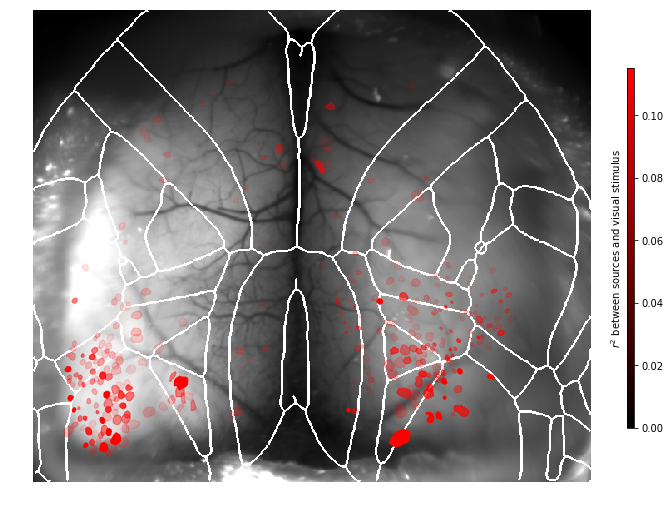

In [7]:
gs.make_correlated_neuron_plot(fast_plot=True) #### DO NOT USE FAST PLOT FOR FINAL FIGURES

nm = 'r2-plot-' + dataset['name'] + '.pdf'
plt.savefig('/home/deisseroth/Dropbox/' + nm)

False
(671, 567, 195)
Saving to /home/deisseroth/Dropbox/Projects/cosmos_data/20180522/cux2ai148m943_visual_stim_1/20180522/cux2ai148m943_visual_stim_1/contours_tuning.pdf
---Plotting contours: 4.709410905838013 seconds ---
all sources =  1429  chosen =  195


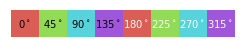

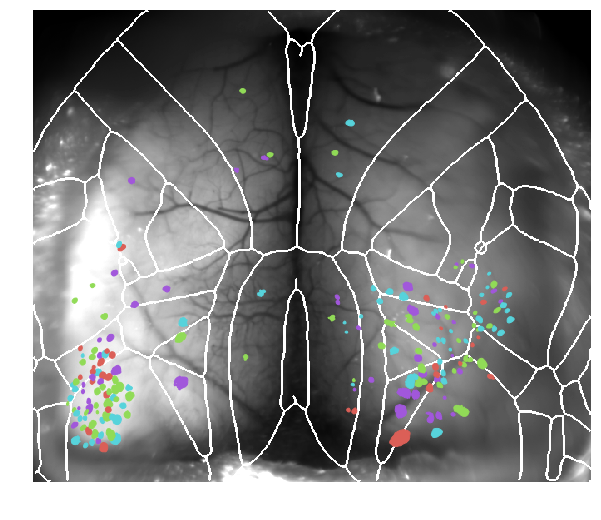

In [8]:
# should we do chosen_on_anova
chosen = np.array(gs.chosen_anova)
gs.plot_source_tuning(chosen)

nm = 'anova-map-' + dataset['name'] + '.pdf'
plt.savefig('/home/deisseroth/Dropbox/' + nm)

In [9]:
if ds == 12:
    # Get traces from all of the datasets we want to include here

    # 12 = mouse 1/194, 8 = mouse 2/72, 13 = mouse 3/943
    is_cosmos = True
    all_ds = [12, 8, 13]
    all_gs = []

    for dsx in all_ds:
        dataset_ = params.DATASETS[dsx]
        print(dataset_['info'])
        print(dataset_['date'])
        dataset_['data_root'] = os.path.join(dropbox_path, 'cosmos_data')

        # We expect there to be nGratings*nTrials=40 detected trials
        traces_ = CosmosTraces(dataset_, behavior_plots=True, ttl_plots=False,
                              use_parent=False, min_area_count=10)

        all_gs.append(utils.GratingStimulus(traces_, is_cosmos, make_plot=False,
                                            use_filtered='F', osi_thresh=0.65))

    _ = utils.make_visual_to_other_area_comparison_plots(all_gs)
    mstr = 'All Mice'
    print(mstr)
    plt.title(mstr)

    #ax = plt.gca()
    #ax.legend_ = None
    #plt.draw()

    nm = 'area-comparison-merged-mice.pdf'
    plt.savefig('/home/deisseroth/Dropbox/' + nm)

In [10]:
ds = 12

In [11]:
if len(gs.chosen_anova) > 2:
    ordered_anova_idx = gs.chosen_on_anova[np.argsort(gs.osis[gs.chosen_on_anova])][::-1]
    ordered_anova_all_vis_idx = np.intersect1d(gs.chosen_anova, gs.both_vis_all)
    ordered_anova_all_vis_idx_right = np.intersect1d(gs.chosen_anova, gs.right_vis_all)
    ordered_anova_all_vis_idx_right = ordered_anova_all_vis_idx_right[
        np.argsort(gs.osis[ordered_anova_all_vis_idx_right])][::-1]
else:
    ordered_anova_idx = gs.chosen_on_anova

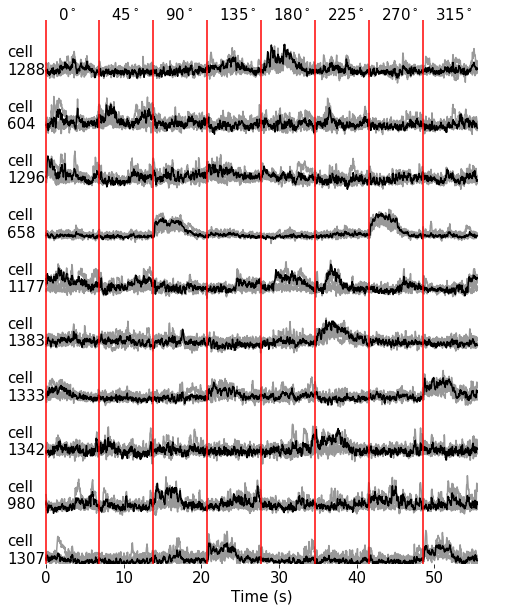

In [12]:
utils.plot_average_visual_response(gs.trial_F, gs.grating_onset_frames, ordered_anova_idx[:10])

In [13]:
ds

12

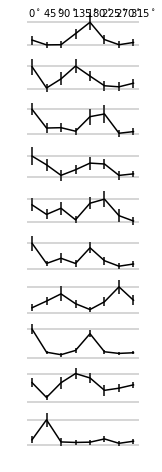

In [14]:
# Now this is only showing top cells from visual areas (on RIGHT side)
gs.make_linear_plots(ordered_anova_all_vis_idx_right[:10], fixed_size=True)
nm = 'raster-top-10-vis-right-' + dataset['name'] + '.pdf'
plt.savefig('/home/deisseroth/Dropbox/' + nm, bbox_inches='tight')

In [15]:
%matplotlib inline

/home/deisseroth/venv2/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


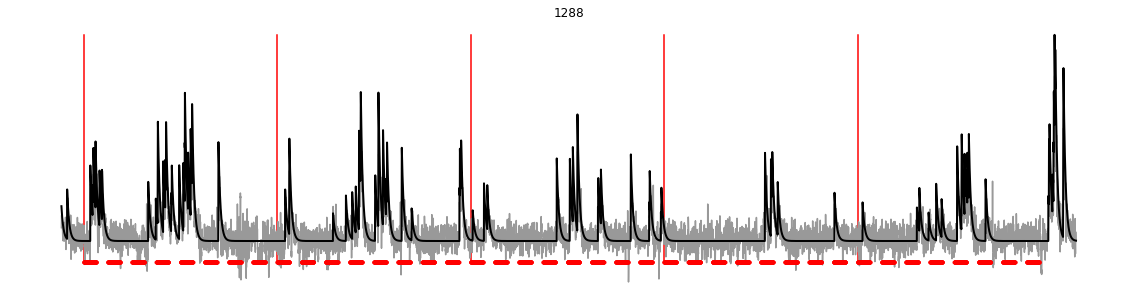

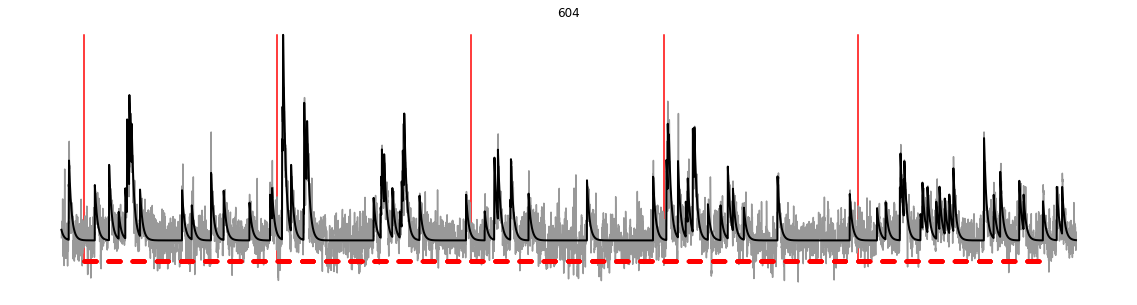

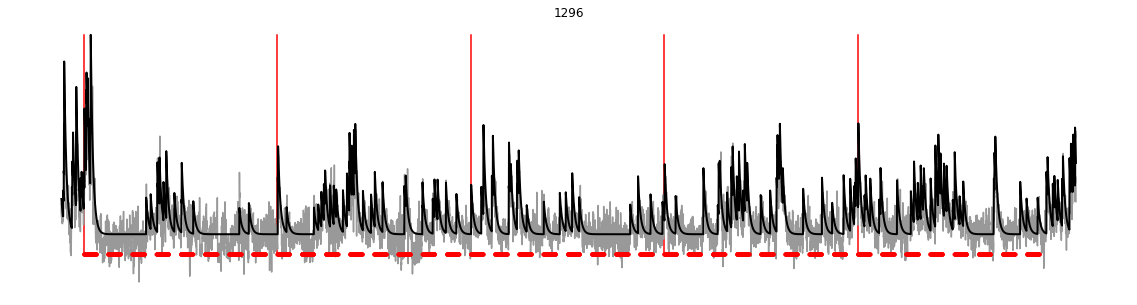

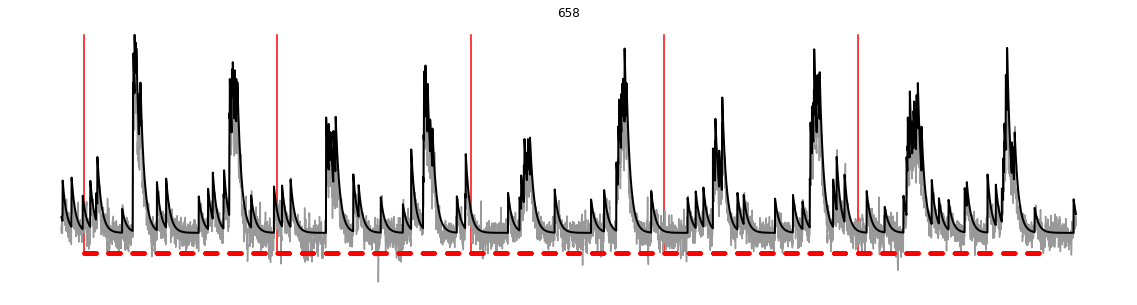

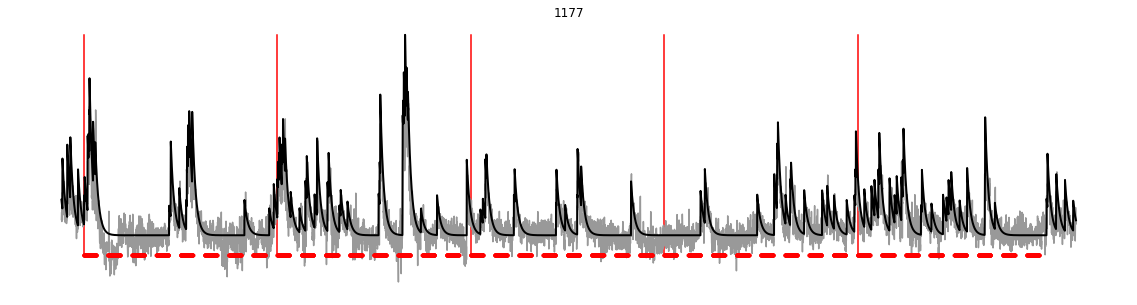

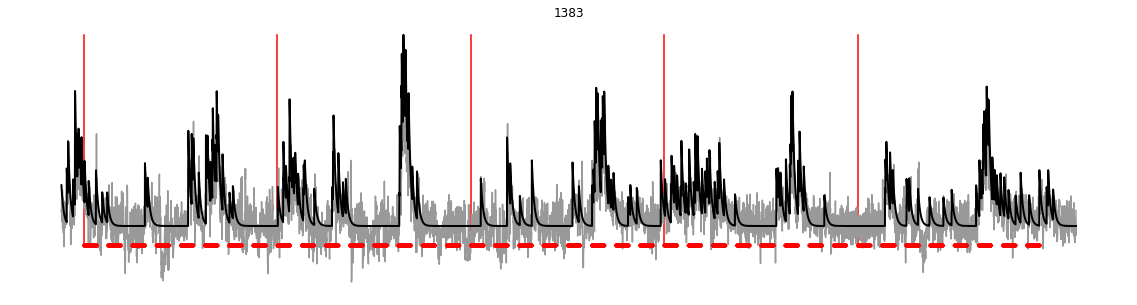

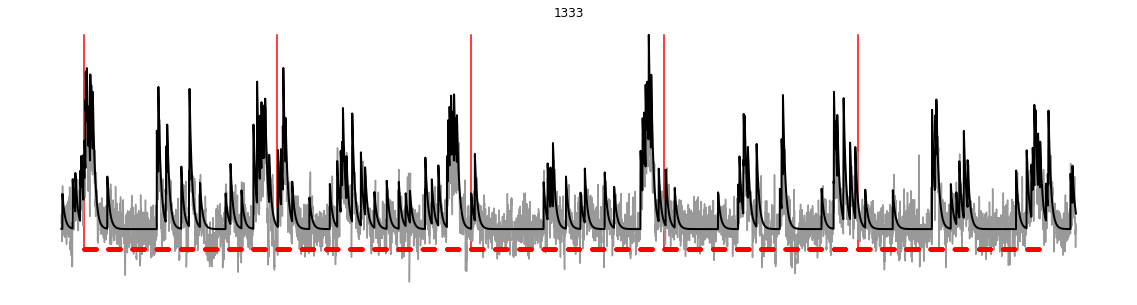

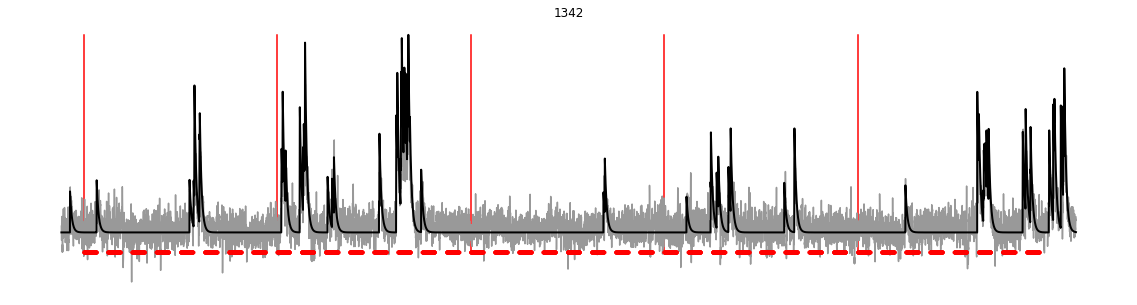

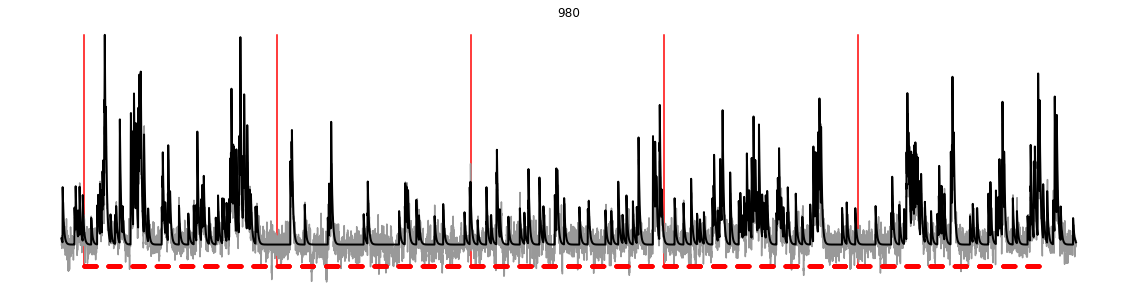

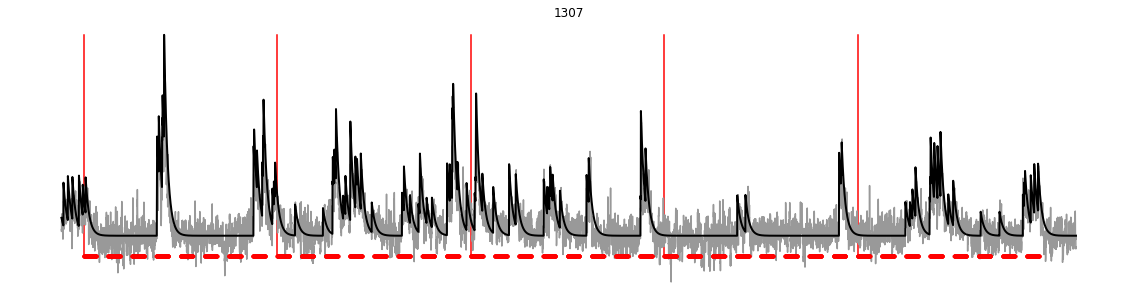

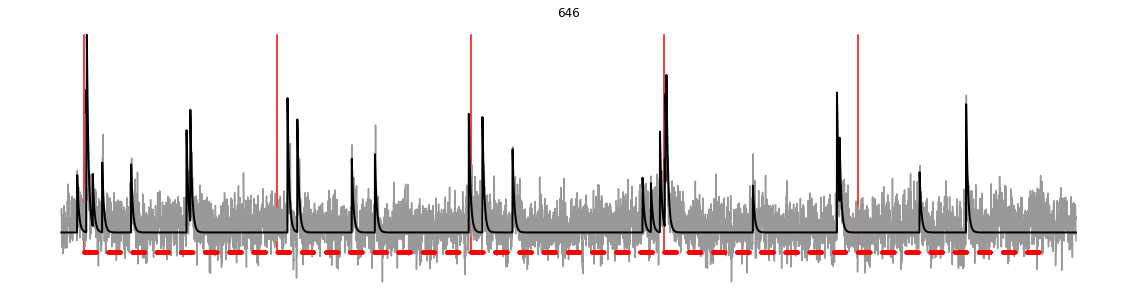

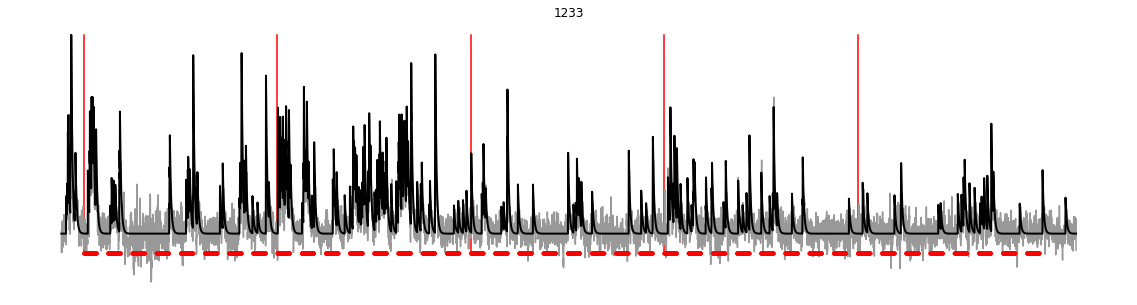

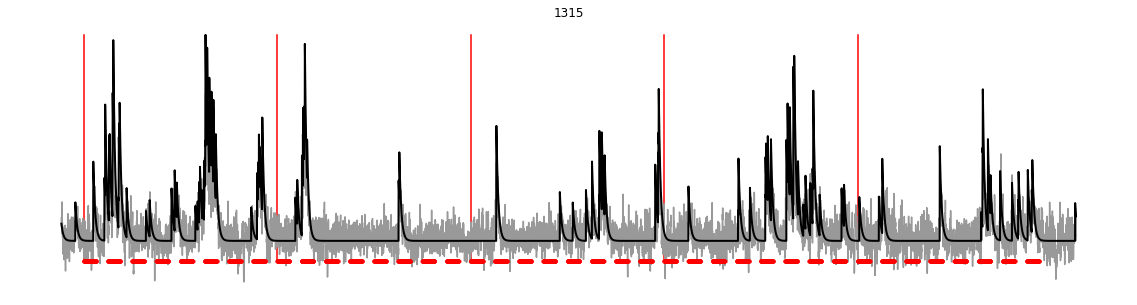

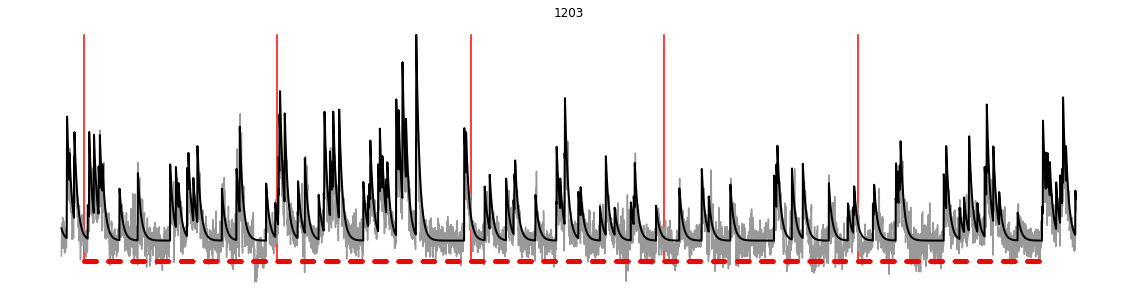

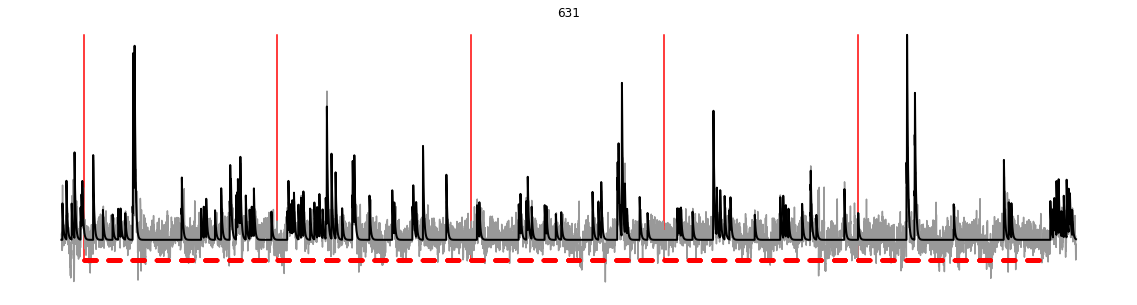

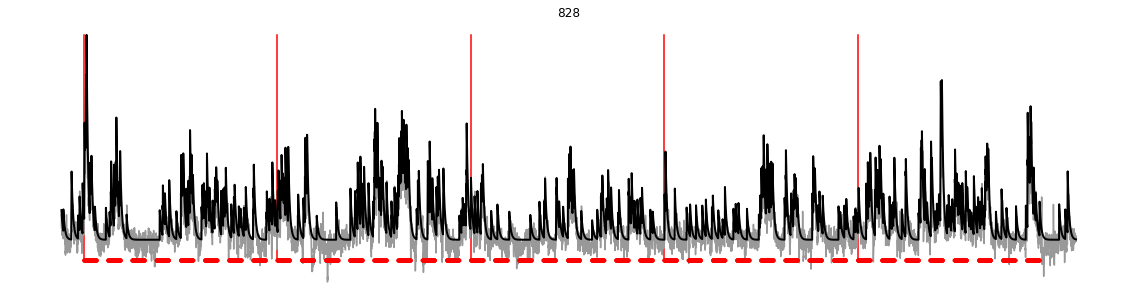

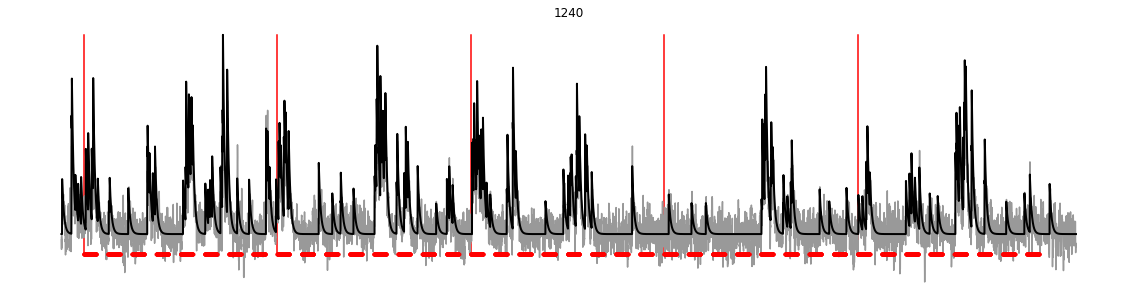

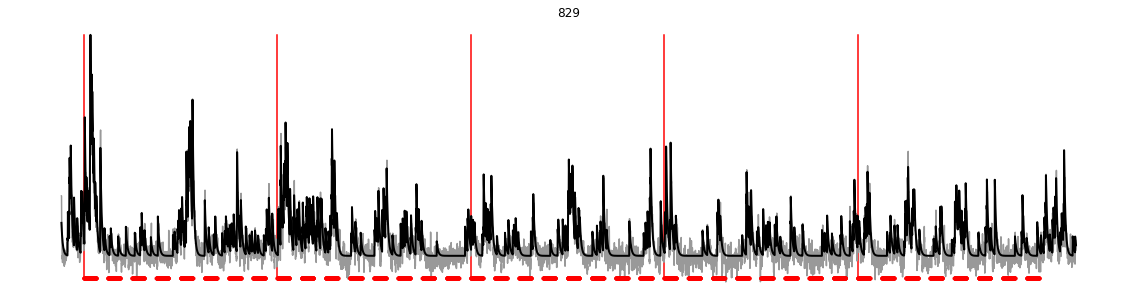

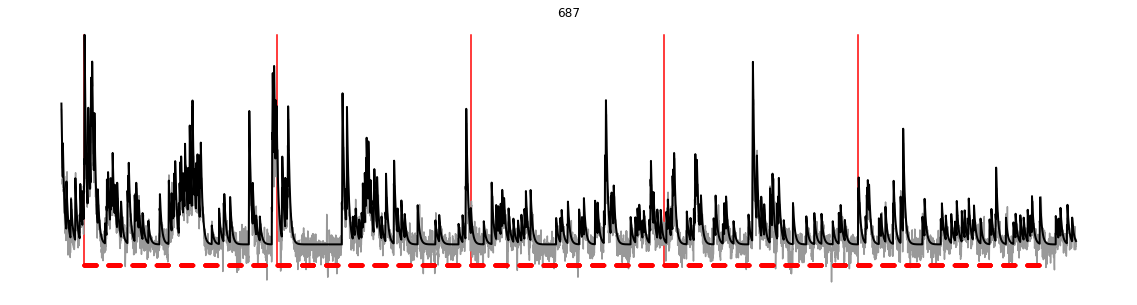

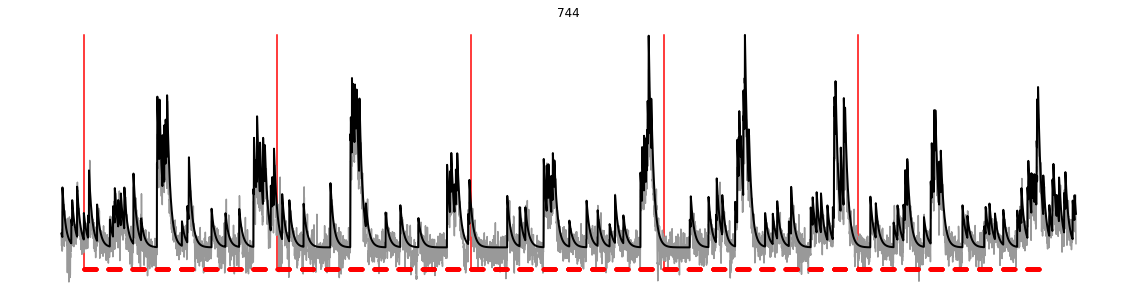

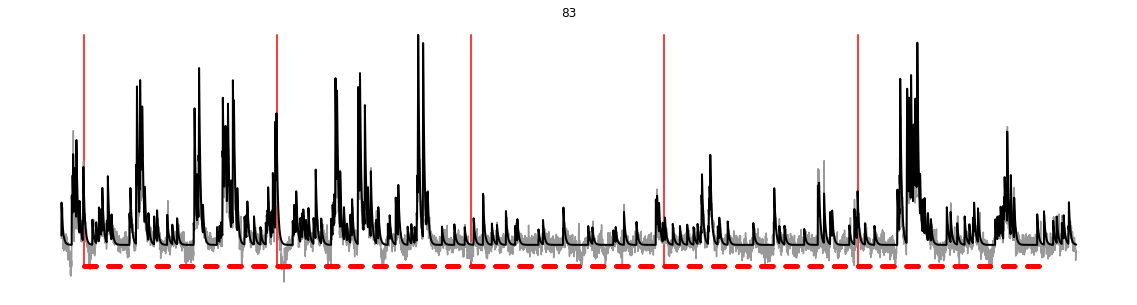

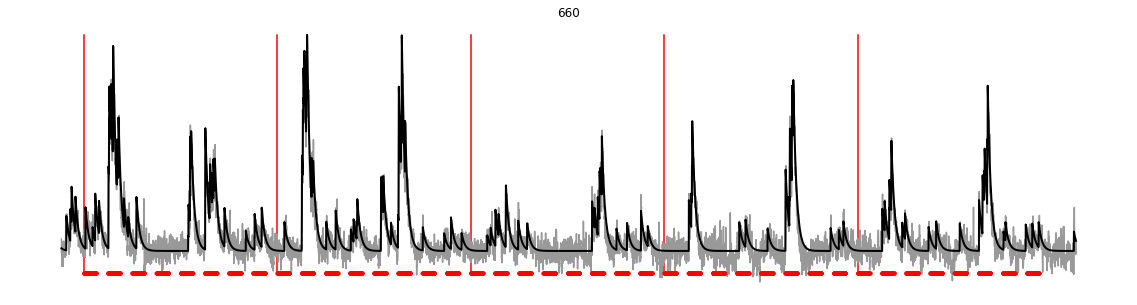

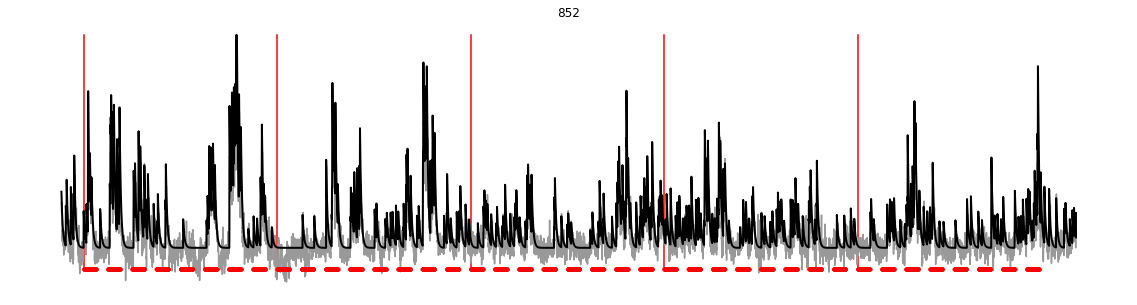

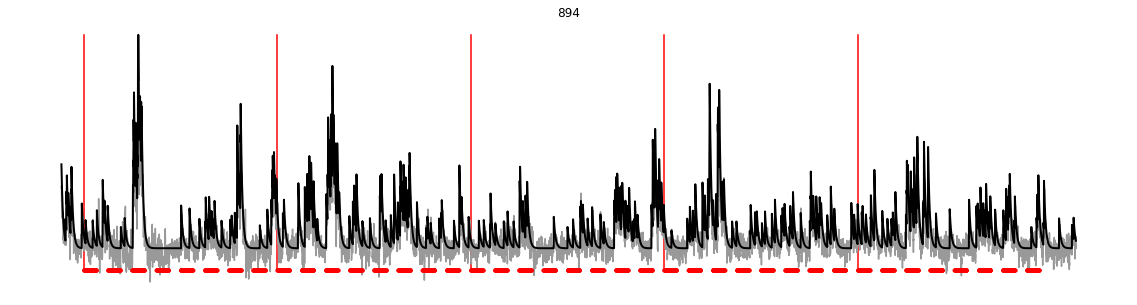

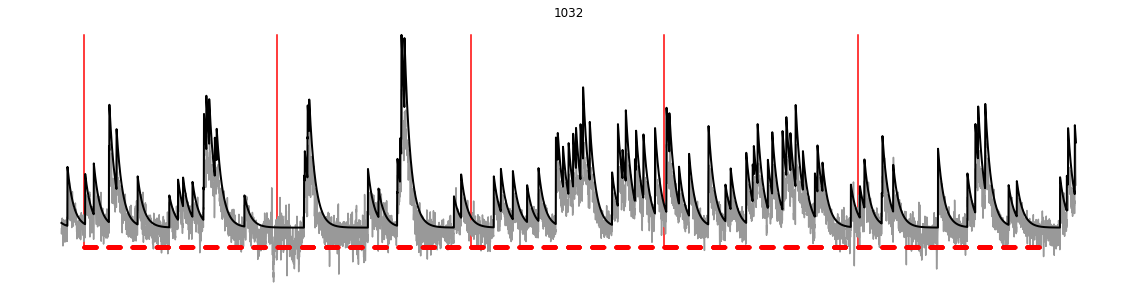

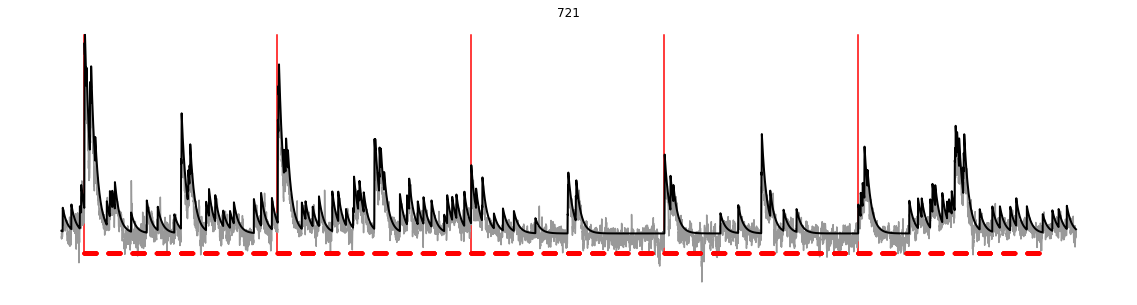

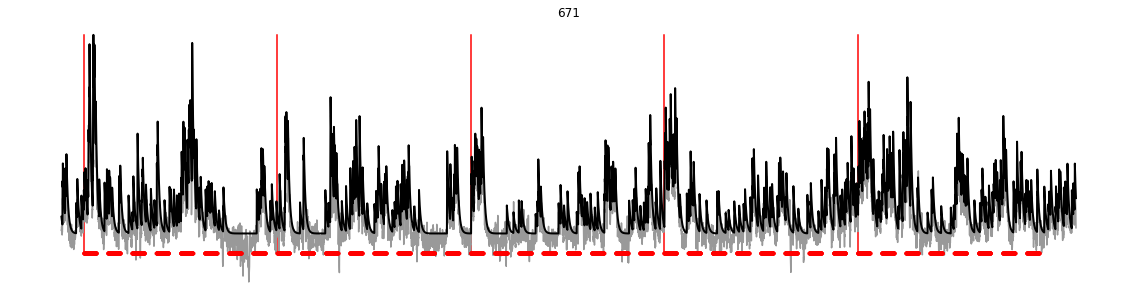

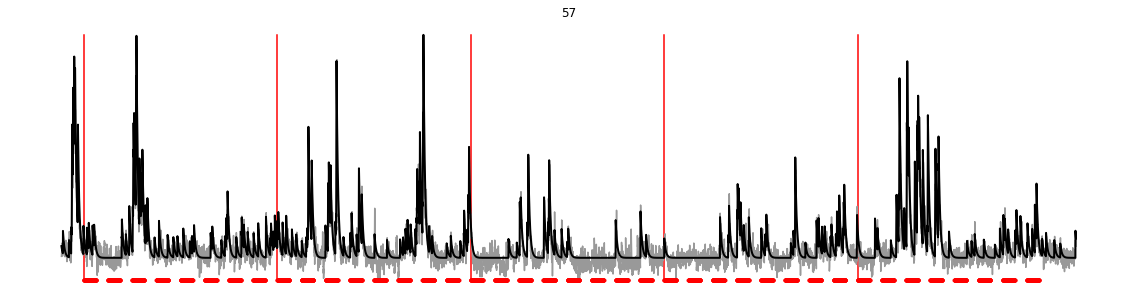

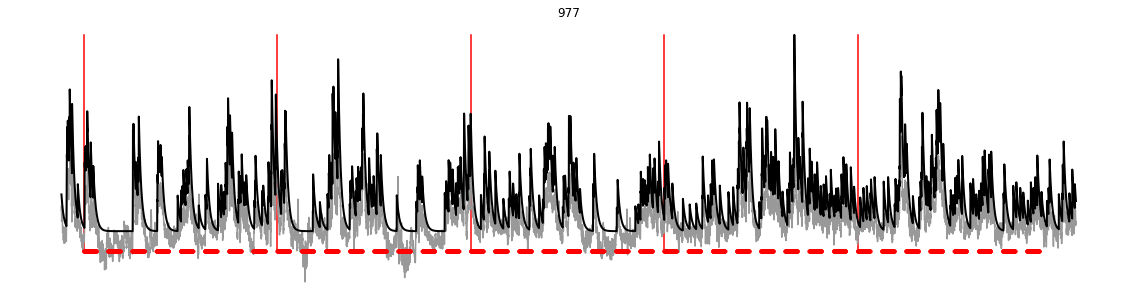

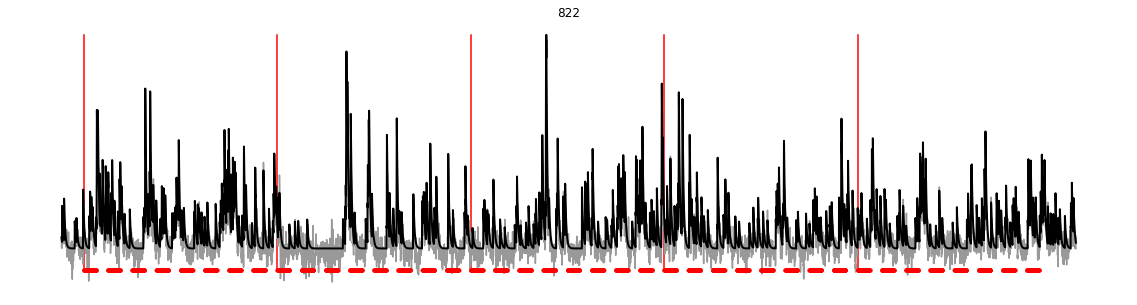

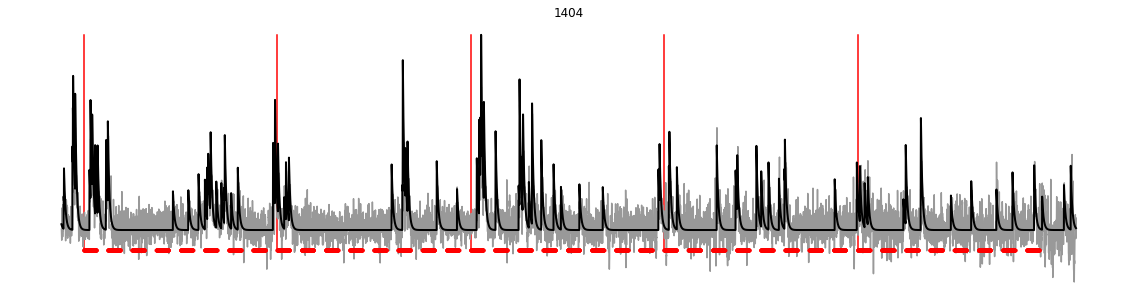

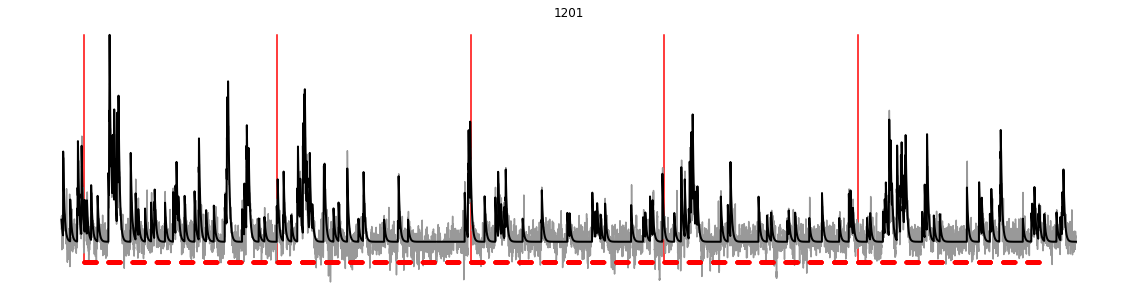

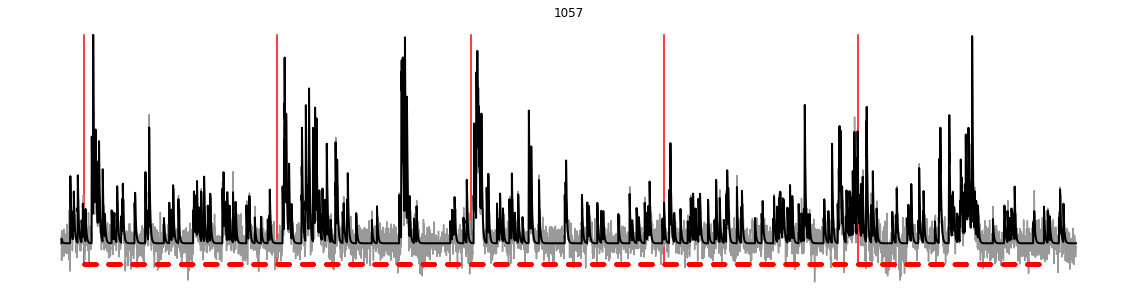

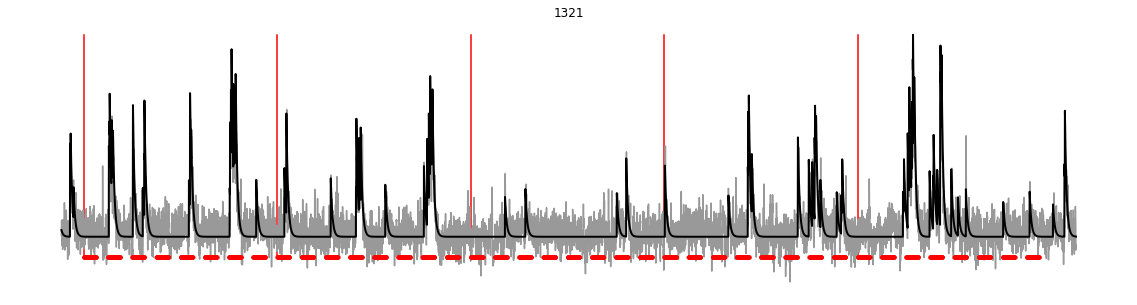

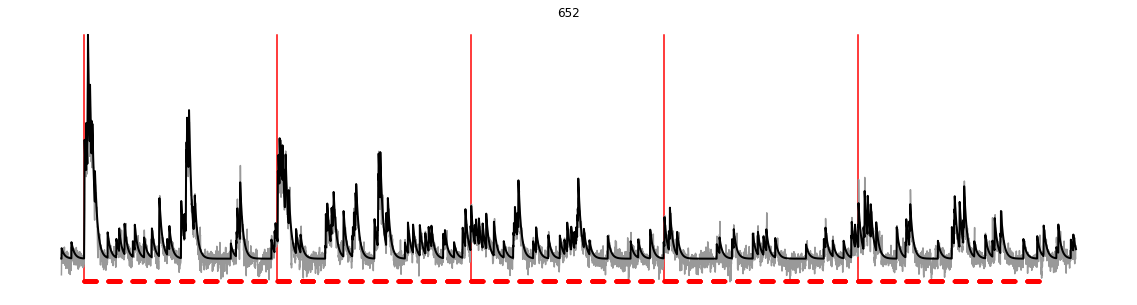

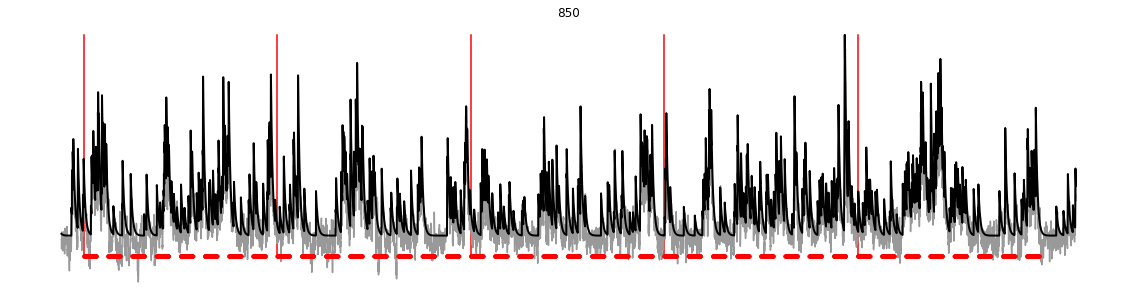

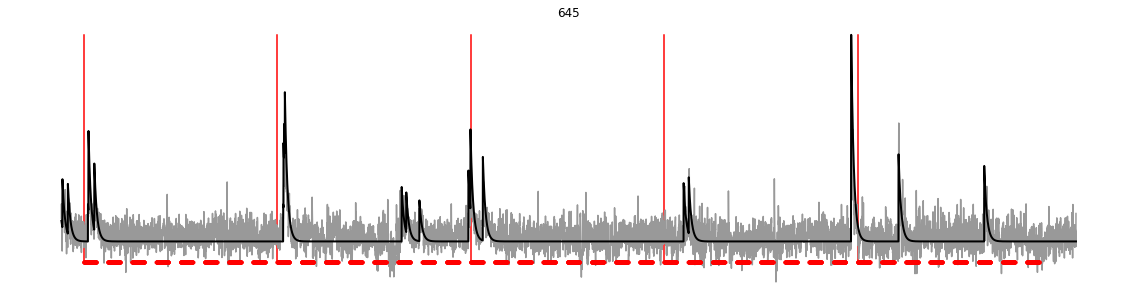

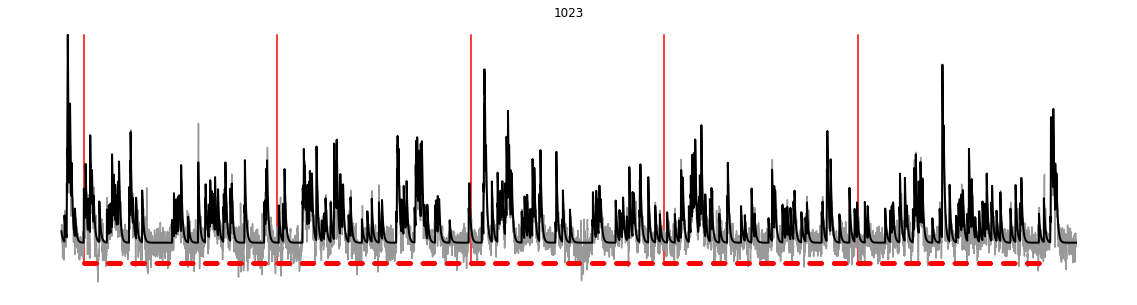

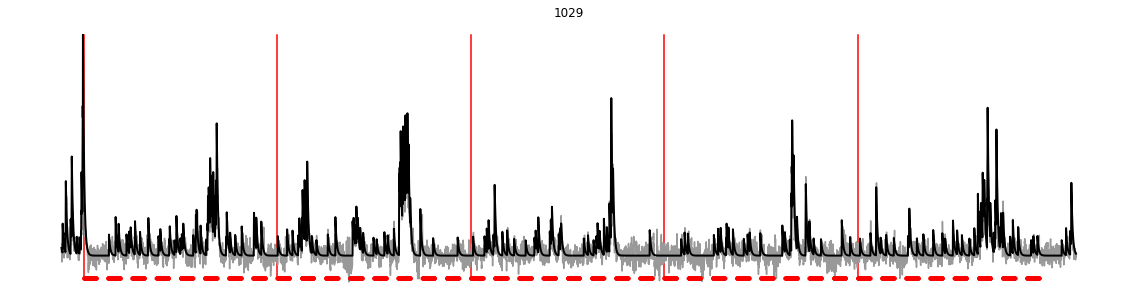

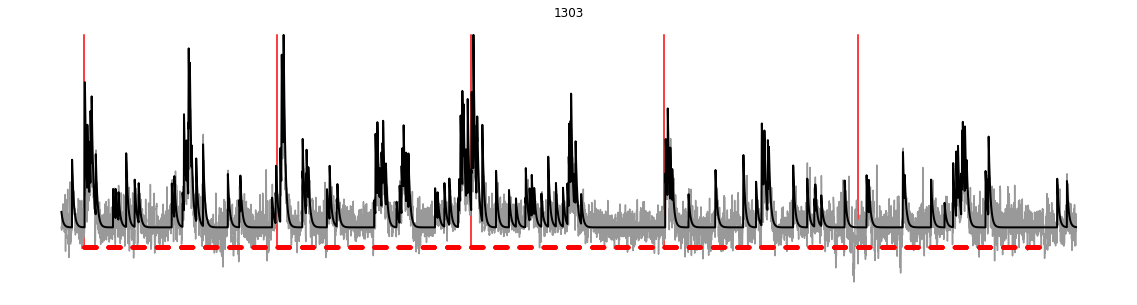

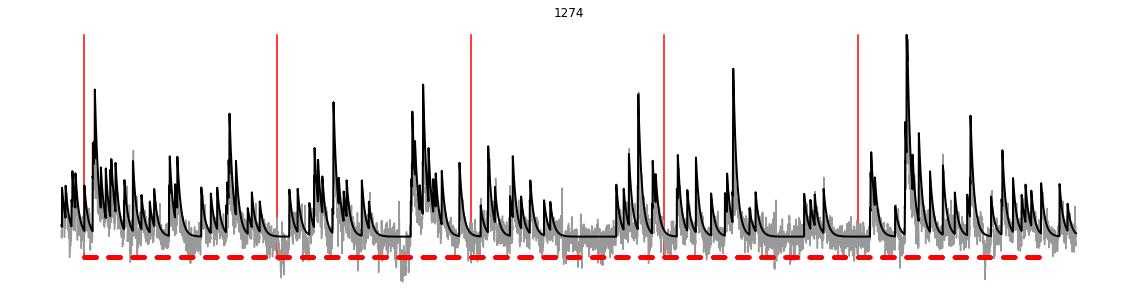

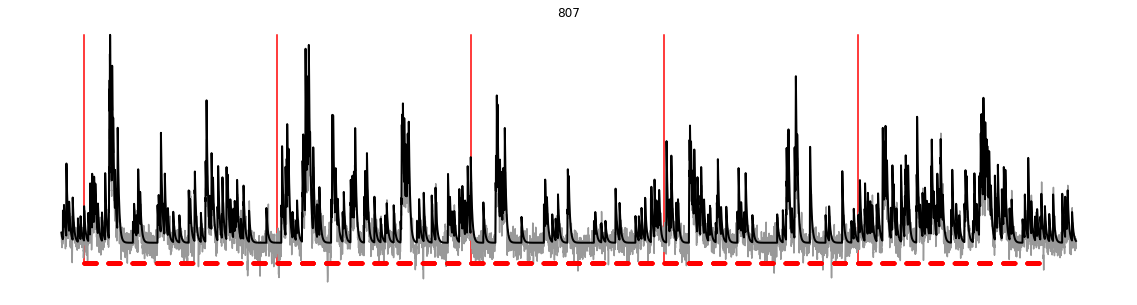

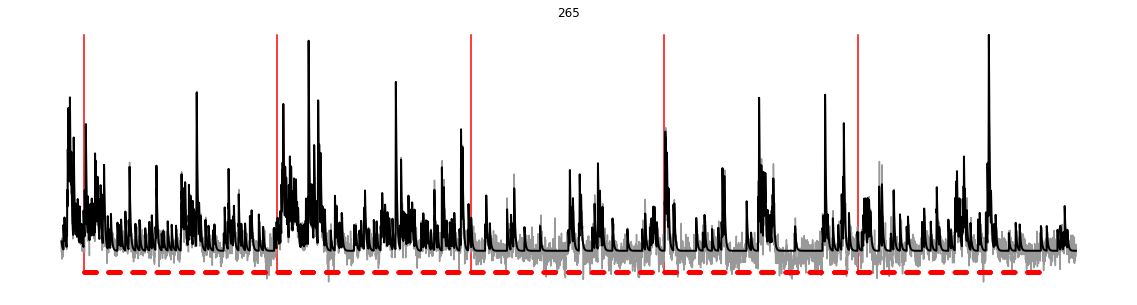

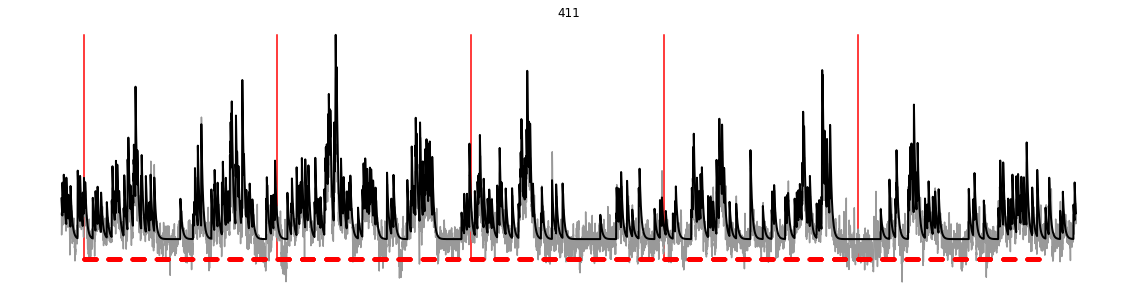

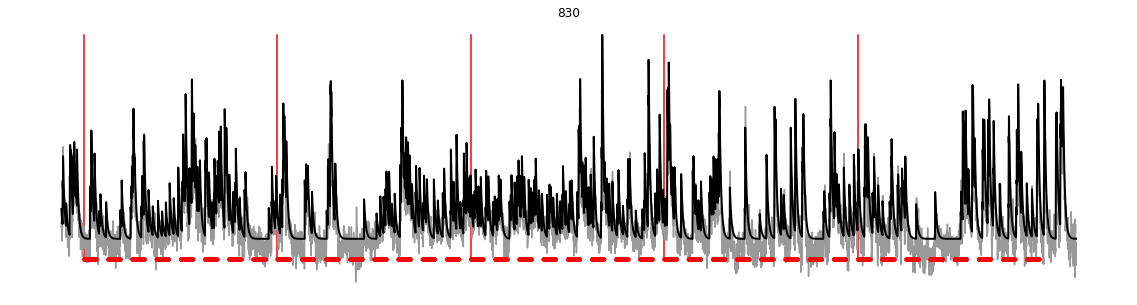

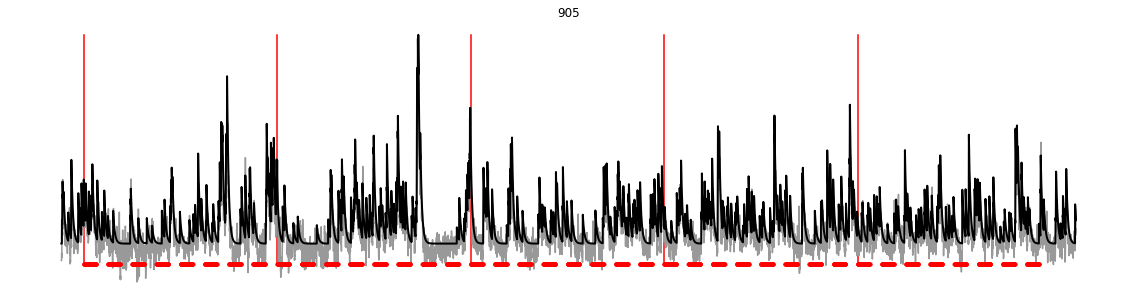

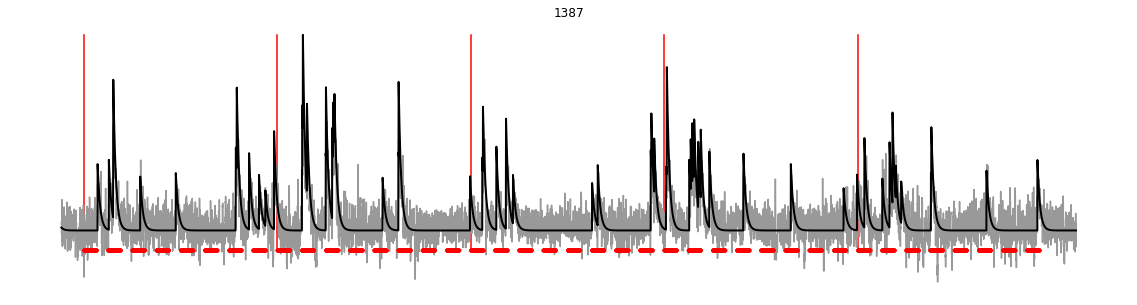

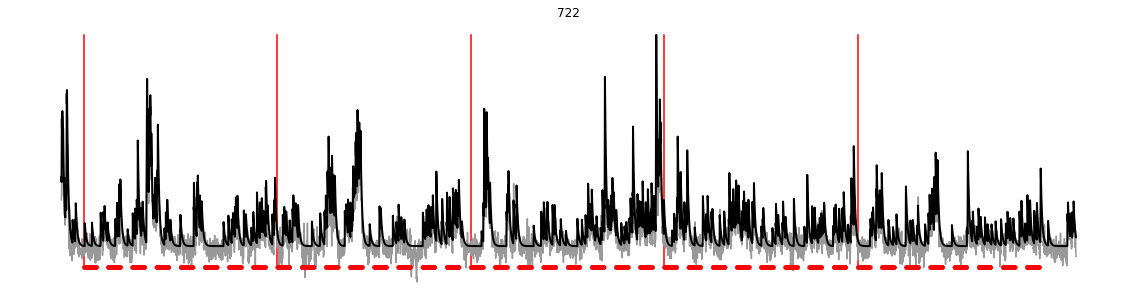

In [16]:
end = 9900
for idx in ordered_anova_idx:
    gs.make_single_trace_plot(idx, end=end, title=True)

(0, 0.8)

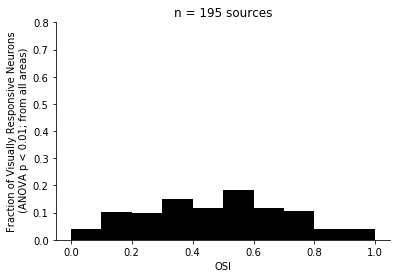

In [17]:
# THIS IS ALL THE ANOVA NEURONS
anova_osis = np.array(gs.osis)[gs.chosen_anova]
plt.hist(anova_osis, np.linspace(0, 1, 11), weights=np.ones(len(anova_osis)) / len(anova_osis), color='black')
plt.xlabel('OSI')
plt.ylabel('Fraction of Visually Responsive Neurons\n (ANOVA p < 0.01; from all areas)')
plt.title('n = ' + str(len(anova_osis)) + ' sources')
sns.despine()
plt.ylim([0, .8])

58
0.09
Fraction of Visually Responsive Neurons
 (ANOVA p < 0.01; only in right visual areas)


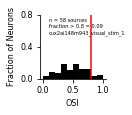

In [18]:
# THIS IS JUST THE ANOVA NEURONS FROM ALL RIGHT VISUAL AREAS
# THIS IS WHAT WE SHOW IN THE FIGURE

# Compute the fraction of neurons above this OSI threshold
clean_thresh = 0.8

anova_osis = np.array(gs.osis)[np.intersect1d(gs.chosen_anova, gs.right_vis_all)]
print(len(anova_osis))

frac = round(len(np.where(anova_osis > clean_thresh)[0])/len(anova_osis), 2)
print(frac)
plt.figure(figsize=(1.1811, 1.1811))

plt.hist(anova_osis, np.linspace(0, 1, 11), weights=np.ones(len(anova_osis)) / len(anova_osis), color='black')
plt.text(.1, .55, 'n = ' + str(len(anova_osis)) + ' sources\n' +
         'fraction > ' + str(clean_thresh) + ' = ' + str(frac) +
         '\n' + dataset['name'],
         fontsize=5)
plt.ylim([0, .8])
plt.xticks([0, 0.5, 1], fontsize=8)
plt.yticks([0, 0.4, 0.8], fontsize=8)
plt.xlabel('OSI', fontsize=8)
plt.ylabel('Fraction of Neurons', fontsize=8)
plt.axvline(clean_thresh, color='r')
sns.despine()

print('Fraction of Visually Responsive Neurons\n (ANOVA p < 0.01; only in right visual areas)')
plt.savefig('plots/vis-right-all-anova-histogram-' + dataset['name'] + '.pdf')

58
0.09


(array([0.03448276, 0.0862069 , 0.06896552, 0.18965517, 0.10344828,
        0.18965517, 0.12068966, 0.12068966, 0.03448276, 0.05172414]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

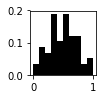

In [19]:
anova_osis = np.array(gs.osis)[np.intersect1d(gs.chosen_anova, gs.right_vis_all)]
print(len(anova_osis))

frac = round(len(np.where(anova_osis > clean_thresh)[0])/len(anova_osis), 2)
print(frac)
plt.figure(figsize=(1.1811, 1.1811))

plt.hist(anova_osis, np.linspace(0, 1, 11), weights=np.ones(len(anova_osis)) / len(anova_osis), color='black')

In [20]:
anova_osis

array([0.47011088, 0.56815997, 0.13726929, 0.16223052, 0.56864275,
       0.71538789, 0.24882054, 0.64116666, 0.38837765, 0.32987855,
       0.74064409, 0.34255319, 0.50772733, 0.31785207, 0.08801795,
       0.30958265, 0.79132995, 0.10121885, 0.74376999, 0.34282272,
       0.55756269, 0.63684492, 0.30740018, 0.30226362, 0.531366  ,
       0.08960747, 0.46550802, 0.72842018, 0.46056685, 0.6979739 ,
       0.38662218, 0.63628078, 0.50782666, 0.69307601, 0.29389363,
       0.38050709, 0.20359776, 0.59984132, 0.52057672, 0.46013789,
       0.25324918, 0.10168161, 0.1308172 , 0.91481339, 0.41384985,
       0.71658435, 0.83105342, 0.34298756, 0.55472718, 0.87155052,
       0.685129  , 0.49669165, 0.98655691, 0.92980724, 0.54346816,
       0.71578378, 0.5968772 , 0.64311482])

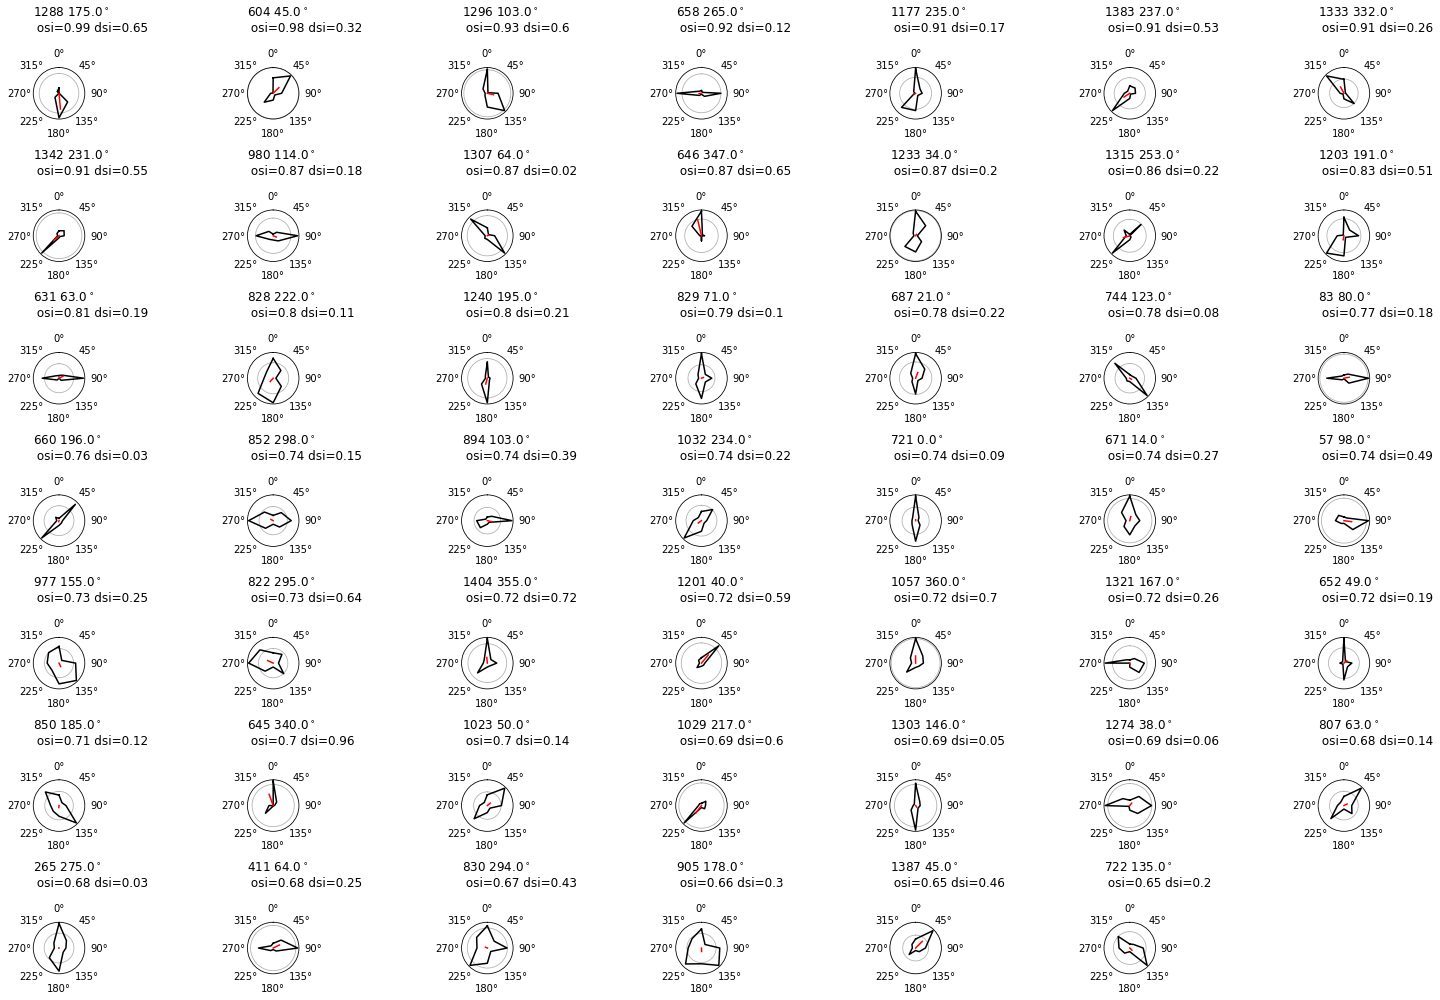

In [21]:
r_anova, theta_anova = gs.make_polar_plots(ordered_anova_idx)

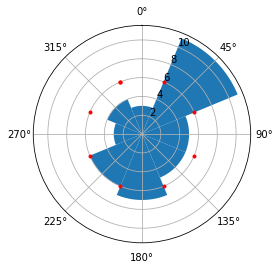

In [22]:
# Polar plot of orientation selectivity
ax = plt.subplot(1, 1, 1, polar=True)
ax.set_rorigin(0)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
dirs_r = np.deg2rad(gs.dirs)

dirs = gs.dirs
dirs = np.concatenate([dirs, np.array([360])]) - 45/2
c = np.deg2rad(dirs)# 
plt.polar(c, [len(theta_anova)/8]*len(c), 'r.')

plt.hist(theta_anova, bins=c)
plt.savefig('plots/v1-anova-polar-' + dataset['name'] + '.pdf')

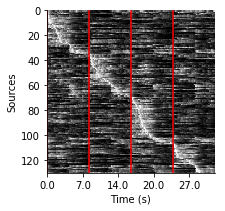

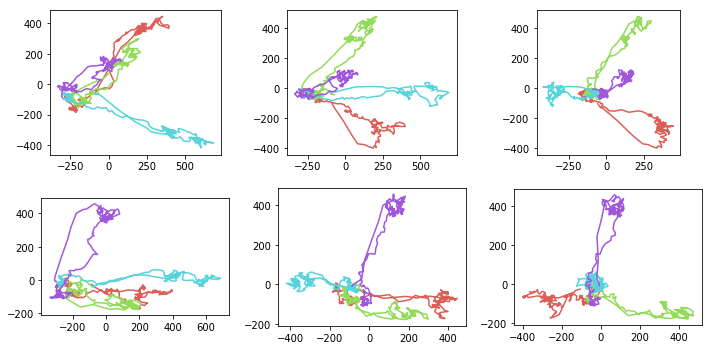

In [23]:
%matplotlib inline
gs.generate_neural_trajectories()

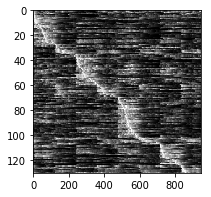

In [24]:
plt.figure(figsize=(3, 3))
ax = plt.subplot(111)
trial_averaged_norm = gs.trial_averaged_ori.copy()
trial_averaged_norm = trial_averaged_norm[
    np.argsort(np.argmax(trial_averaged_norm, 1)), :]
trial_averaged_norm -= np.min(trial_averaged_norm, 1)[:, None]
trial_averaged_norm /= np.max(trial_averaged_norm, 1)[:, None]
plt.imshow(trial_averaged_norm, aspect='auto', cmap='gray')
nm = 'pca_chosen_cells_raster' + str(ds) + '-avg.pdf'
plt.savefig('/home/deisseroth/Dropbox/' + nm, bbox_inches='tight')

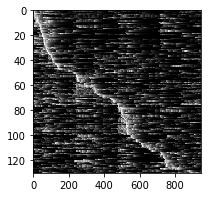

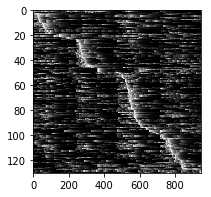

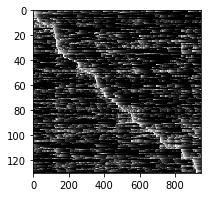

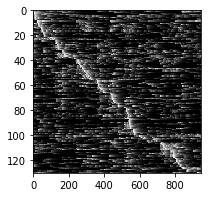

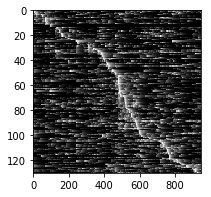

In [25]:
# Plot all 5 of these and then we stack them
for trial in range(5):
    plt.figure(figsize=(3, 3))
    ax = plt.subplot(111)
    trial_averaged_norm = gs.single_trial_ori[:, :, trial].copy()
    trial_averaged_norm = trial_averaged_norm[
        np.argsort(np.argmax(trial_averaged_norm, 1)), :]
    trial_averaged_norm -= np.min(trial_averaged_norm, 1)[:, None]
    trial_averaged_norm /= np.max(trial_averaged_norm, 1)[:, None]
    plt.imshow(trial_averaged_norm, aspect='auto', cmap='gray')
    nm = 'pca_chosen_cells_raster' + str(ds) + '-' + str(trial) +'.pdf'
    plt.savefig('/home/deisseroth/Dropbox/' + nm, bbox_inches='tight')

False
(671, 567, 131)
Saving to /home/deisseroth/Dropbox/Projects/cosmos_data/20180522/cux2ai148m943_visual_stim_1/20180522/cux2ai148m943_visual_stim_1/contours_tuning.pdf
---Plotting contours: 3.22981858253479 seconds ---


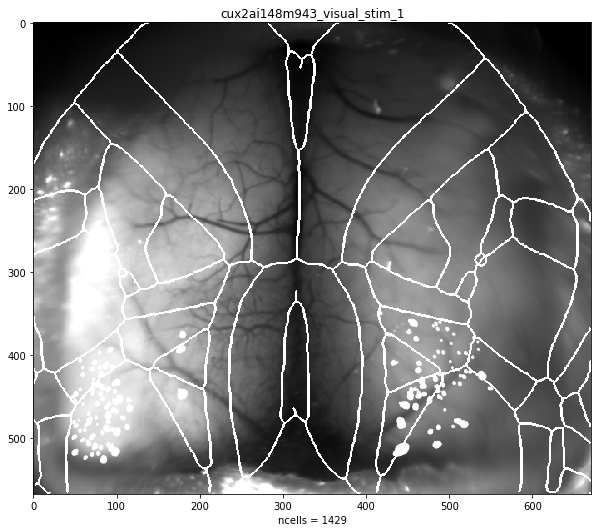

In [26]:
idx_chosen = np.intersect1d(gs.chosen_anova, gs.both_vis_all)
self = gs
cp = CellPlotter(self.traces.C, self.traces.F,
                 self.traces.footprints, self.traces.mean_image,
                 date=self.traces.date, name=self.traces.name,
                 fig_save_path=self.traces.fig_save_path,
                 suffix='tuning.pdf')

cp.set_highlighted_neurons(np.array(idx_chosen))
cp.plot_contours(highlight_neurons=True, edge_color=(1, 0, 0, 0),
                 maxthr=.8, highlight_color=(1, 1, 1, 1), #threshold is bigger...
                 atlas_outline=gs.traces.atlas_outline,
                 just_show_highlighted=True)
nm = 'pca_chosen_cells-' + str(ds) + '.pdf'
plt.savefig('/home/deisseroth/Dropbox/' + nm, bbox_inches='tight')

In [27]:
dropbox_path

'/home/deisseroth/Dropbox/Projects/'

In [28]:
% matplotlib inline


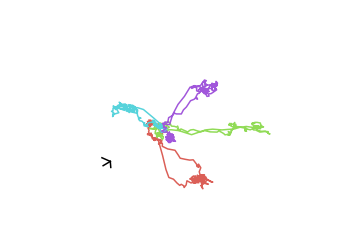

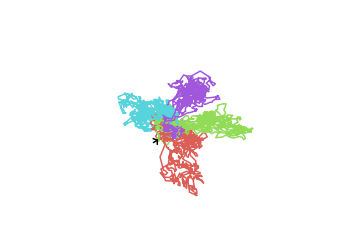

In [29]:
#% matplotlib notebook
#% matplotlib notebook
import matplotlib.pyplot as plt
gs.plot_neural_trajectories()

1 0 82.1725881390547
2 0 82.46612019306137
2 1 85.03527489546977
3 0 87.21095910274255
3 1 82.80033433573792
3 2 91.54968166485631


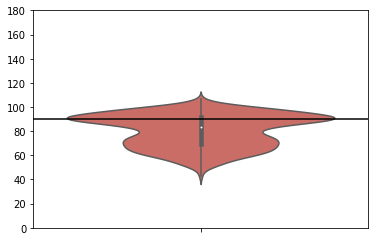

In [30]:
angles = gs.compute_angles_between_trajectories()

# Plot stats

In [31]:
%matplotlib inline

In [32]:
import pandas as pd

summary = pd.DataFrame()

def check_stats(computed, hard_coded):
    test = np.max(np.array(computed) - np.array(hard_coded) < 1e5)
    print('Checking', dataset['name'], ':', test)
    if not test:
        raise ValueError('Invalid test statistics!!!')

x = [60.99823348,77.0474422,63.5255912,65.06918368,61.79316135,68.3302981]
if dataset['name'] == 'cux2ai148m194_visual_stim_1':
    check_stats(angles, x)
for a in x:
    d = {'Mouse': 1, 'Data': a, 'Microscope': 'COSMOS'}
    summary = summary.append(d, ignore_index=True)

x = [73.01085293,68.13703306,75.31338929,65.31967695,75.31008795,72.27392188]
if dataset['name'] == 'm72_vis_stim_2':
    check_stats(angles, x)
for a in x:
    d = {'Mouse': 2, 'Data': a, 'Microscope': 'COSMOS'}
    summary = summary.append(d, ignore_index=True)

x = [81.85490925, 90.60248922, 83.00958417,81.85823021,80.50396802,90.74899789]
if dataset['name'] == 'cux2ai148m943_visual_stim_1':
    check_stats(angles, x)
for a in x:
    d = {'Mouse': 3, 'Data': a, 'Microscope': 'COSMOS'}
    summary = summary.append(d, ignore_index=True)

x= [74.16911459,103.0654223,94.89206259,88.34936823,91.03123654,83.09985864]
for a in x:
    d = {'Mouse': 1, 'Data': a, 'Microscope': 'Two Photon'}
    summary = summary.append(d, ignore_index=True)

x=[59.26334161,125.4598745,120.409388,84.63487853,75.21883725,115.3206146]
for a in x:
    d = {'Mouse': 2, 'Data': a, 'Microscope': 'Two Photon'}
    summary = summary.append(d, ignore_index=True)

x = [89.49461754,88.50581232,87.44928402,101.0838303,99.84151723,99.18972995]
for a in x:
    d = {'Mouse': 3, 'Data': a, 'Microscope': 'Two Photon'}
    summary = summary.append(d, ignore_index=True)


Checking cux2ai148m943_visual_stim_1 : True


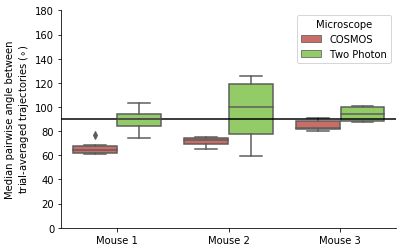

In [33]:
plt.figure()
ax = plt.subplot(111)
sns.boxplot(data=summary, x='Mouse', y='Data', hue='Microscope', orient='vertical')
plt.axhline(90, color='k')
plt.ylim([0, 180])
sns.despine()
plt.xlabel('')
plt.ylabel('Median pairwise angle between\ntrial-averaged trajectories ($\circ$)')
ax.set_xticklabels(['Mouse 1', 'Mouse 2', 'Mouse 3'])
plt.savefig('plots/trajectories-angle-differences.pdf')

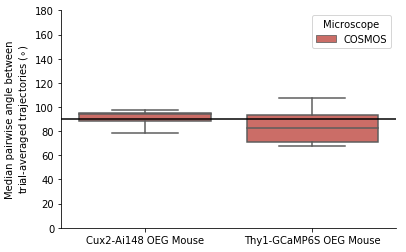

In [34]:
# For OEG mice
summary = pd.DataFrame()
# Cux2-OEG
x = [78.48257842,97.2011791,95.07550233,94.65642802,94.29517314,86.18704937]
for a in x:
    d = {'Mouse': 4, 'Data': a, 'Microscope': 'COSMOS'}
    summary = summary.append(d, ignore_index=True)

# Thy1-OEG
x = [67.70269188,107.3608436,95.02568728,68.40401047,77.48790537,88.02070469]
for a in x:
    d = {'Mouse': 5, 'Data': a, 'Microscope': 'COSMOS'}
    summary = summary.append(d, ignore_index=True)

plt.figure()
ax = plt.subplot(111)
sns.boxplot(data=summary, x='Mouse', y='Data', hue='Microscope', orient='vertical')
plt.axhline(90, color='k')
plt.ylim([0, 180])
sns.despine()
plt.xlabel('')
plt.ylabel('Median pairwise angle between\ntrial-averaged trajectories ($\circ$)')
ax.set_xticklabels(['Cux2-Ai148 OEG Mouse', 'Thy1-GCaMP6S OEG Mouse'])
plt.savefig('plots/trajectories-angle-differences-oeg.pdf')